## Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction: Business Problem

How to choose best location to start a Coffee Shop in Chicago?
Coffee shop is wide spread business in many Area but there are many points of difference in coffee shop business such as price and location. To achieve the goal we need to answer some questions as below


# Data

Using Data from Foursquare API and Google Maps API geocoding

# Methodology

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np
import pandas as pd
!pip install folium
!pip install KMeans
!pip install geocoder
!pip install geopandas
!pip install shapely
!pip install geopy
import folium
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: Cryptograp

In [2]:
from geopy.geocoders import Nominatim 

In [3]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: 5D3ODJEBAQWQZ2P34KBQVRF1CMCOULNZSAWNQ1EA3LMBKRQK
CLIENT_SECRET:NJD4C03SIIZ5YM2V5IZS0KH0PBQVNLA3R2BNFJDD3DV2VYLM


In [4]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [5]:
import requests

request_coffee_parameters = {
    "client_id": CLIENT_ID,
    "client_secret": CLIENT_SECRET,
    "v": '20180605',
    "section": "coffee",
    "near": "Chicago",
    "radius": 1000,
    "limit": 50}

data = requests.get("https://api.foursquare.com/v2/venues/explore", params=request_coffee_parameters)

In [6]:
d = data.json()["response"]
d.keys()

dict_keys(['geocode', 'headerLocation', 'headerFullLocation', 'headerLocationGranularity', 'query', 'totalResults', 'suggestedBounds', 'groups'])

In [7]:
d["headerLocationGranularity"], d["headerLocation"], d["headerFullLocation"]

('city', 'Chicago', 'Chicago')

In [8]:
d["suggestedBounds"], d["totalResults"]

({'ne': {'lat': 41.85867600366658, 'lng': -87.64093234235476},
  'sw': {'lat': 41.84650992300174, 'lng': -87.65991081055004}},
 5)

In [9]:
d["geocode"]

{'what': '',
 'where': 'chicago',
 'center': {'lat': 41.85003, 'lng': -87.65005},
 'displayString': 'Chicago, IL, United States',
 'cc': 'US',
 'geometry': {'bounds': {'ne': {'lat': 42.023134999999996,
    'lng': -87.52366099999999},
   'sw': {'lat': 41.644286, 'lng': -87.940101}}},
 'slug': 'chicago-illinois',
 'longId': '72057594042815334'}

In [10]:
d["groups"][0].keys()

dict_keys(['type', 'name', 'items'])

In [11]:
d["groups"][0]["type"], d["groups"][0]["name"]

('Recommended Places', 'recommended')

In [12]:
items = d["groups"][0]["items"]
print("number of items: %i" % len(items))
items[0]

number of items: 5


{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4a76198cf964a52039e21fe3',
  'name': "Kristoffer's Café & Bakery",
  'location': {'address': '1733 S Halsted St',
   'crossStreet': 'at 18th St.',
   'lat': 41.858123,
   'lng': -87.646558,
   'labeledLatLngs': [{'label': 'display',
     'lat': 41.858123,
     'lng': -87.646558}],
   'postalCode': '60608',
   'cc': 'US',
   'city': 'Chicago',
   'state': 'IL',
   'country': 'United States',
   'formattedAddress': ['1733 S Halsted St (at 18th St.)',
    'Chicago, IL 60608',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d16a941735',
    'name': 'Bakery',
    'pluralName': 'Bakeries',
    'shortName': 'Bakery',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-5-4a76198cf964a52039e2

In [13]:
items[1]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4b80ab02f964a520e88430e3',
  'name': "Dunkin'",
  'location': {'address': '2477 S Archer Ave',
   'crossStreet': 'at Halsted',
   'lat': 41.84706292666833,
   'lng': -87.64597398956664,
   'labeledLatLngs': [{'label': 'display',
     'lat': 41.84706292666833,
     'lng': -87.64597398956664}],
   'postalCode': '60616',
   'cc': 'US',
   'city': 'Chicago',
   'state': 'IL',
   'country': 'United States',
   'formattedAddress': ['2477 S Archer Ave (at Halsted)',
    'Chicago, IL 60616',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d148941735',
    'name': 'Donut Shop',
    'pluralName': 'Donut Shops',
    'shortName': 'Donuts',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/donuts_',
     'suffix': '.png'},
    'primary': True}],
  'delivery': {'id': '1393129',
   'url': 'https://www.grubhub.

# Analysis

Step 2 : Plot in Map and Using Heatmap to visualize density.
From that visualization, Coffee shop is located near by each other around lower west side

In [14]:
df_raw = []
for item in items:
    venue = item["venue"]
    categories, uid, name, location = venue["categories"], venue["id"], venue["name"], venue["location"]
    print(location)
    assert len(categories) == 1
    shortname = categories[0]["shortName"]
    address =  ''
    if hasattr(location, 'address'):
      address = location['address']
    if not "postalCode" in location:
        continue
    postalcode = location["postalCode"]
    lat = location["lat"]
    lng = location["lng"]
    datarow = (uid, name, shortname, address, postalcode, lat, lng)
    df_raw.append(datarow)
df = pd.DataFrame(df_raw, columns=["uid", "name", "shortname", "address", "postalcode", "lat", "lng"])
print("found %i cafes" % len(df))
df.head()

{'address': '1733 S Halsted St', 'crossStreet': 'at 18th St.', 'lat': 41.858123, 'lng': -87.646558, 'labeledLatLngs': [{'label': 'display', 'lat': 41.858123, 'lng': -87.646558}], 'postalCode': '60608', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['1733 S Halsted St (at 18th St.)', 'Chicago, IL 60608', 'United States']}
{'address': '2477 S Archer Ave', 'crossStreet': 'at Halsted', 'lat': 41.84706292666833, 'lng': -87.64597398956664, 'labeledLatLngs': [{'label': 'display', 'lat': 41.84706292666833, 'lng': -87.64597398956664}], 'postalCode': '60616', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['2477 S Archer Ave (at Halsted)', 'Chicago, IL 60616', 'United States']}
{'address': '1316 W Cermak Rd', 'lat': 41.8526483657568, 'lng': -87.6590481529048, 'labeledLatLngs': [{'label': 'display', 'lat': 41.8526483657568, 'lng': -87.6590481529048}, {'label': 'entrance', 'lat': 41.852552, 'lng': -87.65

,uid,name,shortname,address,postalcode,lat,lng
0,4a76198cf964a52039e21fe3,Kristoffer's Café & Bakery,Bakery,,60608,41.858123,-87.646558
1,4b80ab02f964a520e88430e3,Dunkin',Donuts,,60616,41.847063,-87.645974
2,597cf050898bdc5ce5bc3d89,Dunkin',Donuts,,60608,41.852648,-87.659048
3,601c1198a38d5406d3ed9af3,La Malinche Coffee House,Coffee Shop,,60608,41.853757,-87.646684
4,605f94e445d7e9003fe290df,Fat Miilk,Coffee Shop,,60616,41.854120,-87.641795


In [15]:
df = pd.DataFrame(df_raw, columns=["uid", "name", "shortname", "address", "postalcode", "lat", "lng"])

In [16]:
df.groupby('shortname').count()

,uid,name,address,postalcode,lat,lng
shortname,,,,,,
Bakery,1,1,1,1,1,1
Coffee Shop,2,2,2,2,2,2
Donuts,2,2,2,2,2,2


In [17]:
chicago = d["geocode"]["center"]
chicago

{'lat': 41.85003, 'lng': -87.65005}

Coffee shops are nearly located around West Cermak Road 

In [18]:
from folium import plugins


map_chicago = folium.Map(location=[41.85003, -87.65005], zoom_start=14)

def add_markers(df):
    for (j, row) in df.iterrows():
        label = folium.Popup(row["name"], parse_html=True)
        folium.CircleMarker(
            [row["lat"], row["lng"]],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_chicago)

add_markers(df)
hm_data = df[["lat", "lng"]].to_numpy().tolist()
map_chicago.add_child(plugins.HeatMap(hm_data))

map_chicago

In [19]:
request_office_parameters = {
    "client_id": CLIENT_ID,
    "client_secret": CLIENT_SECRET,
    "v": '20180605',
    #"section": "School",
    "near": "Chicago",
    "radius": 1000,
    "limit": 50}

data_office = requests.get("https://api.foursquare.com/v2/venues/explore", params=request_office_parameters)

Step 3 : Looking for overall Business in Chicago
Found that, various style of restaurants spread in the city. Chicago include 4 Art Gallery's and 3 Parks that’s should be the place for tourists. If I start the coffee speacialty store near area of tourism area should be good and Tourists are our target customers 


In [20]:
d_office = data_office.json()["response"]
d_office ["headerLocationGranularity"], d_office ["headerLocation"], d_office ["headerFullLocation"]
d_office ["suggestedBounds"], d_office ["totalResults"]
d_office ["geocode"]
d_office ["groups"][0].keys()
d_office ["groups"][0]["type"], d_office ["groups"][0]["name"]
items2 = d_office ["groups"][0]["items"]
print("number of items: %i" % len(items2))
items2[0]


number of items: 50


{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '555f7b95498e2f2bd6859b71',
  'name': 'Chicago Helicopter Experience',
  'location': {'address': '2420 S Halsted St',
   'lat': 41.8484113911258,
   'lng': -87.64755090156284,
   'labeledLatLngs': [{'label': 'display',
     'lat': 41.8484113911258,
     'lng': -87.64755090156284}],
   'postalCode': '60608',
   'cc': 'US',
   'city': 'Chicago',
   'state': 'IL',
   'country': 'United States',
   'formattedAddress': ['2420 S Halsted St',
    'Chicago, IL 60608',
    'United States']},
  'categories': [{'id': '56aa371ce4b08b9a8d57356e',
    'name': 'Heliport',
    'pluralName': 'Heliports',
    'shortName': 'Heliport',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/default_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-555f7b95498e2f2bd6859b71-0

In [21]:
df_raw2 = []
for item in items2:
    venue = item["venue"]
    categories, uid, name, location = venue["categories"], venue["id"], venue["name"], venue["location"]
    print(location)
    assert len(categories) == 1
    shortname = categories[0]["shortName"]
    address =  ''
    if hasattr(location, 'address'):
      address = location['address']
    if not "postalCode" in location:
        continue
    postalcode = location["postalCode"]
    lat = location["lat"]
    lng = location["lng"]
    datarow = (uid, name, shortname, address, postalcode, lat, lng)
    df_raw2.append(datarow)

{'address': '2420 S Halsted St', 'lat': 41.8484113911258, 'lng': -87.64755090156284, 'labeledLatLngs': [{'label': 'display', 'lat': 41.8484113911258, 'lng': -87.64755090156284}], 'postalCode': '60608', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['2420 S Halsted St', 'Chicago, IL 60608', 'United States']}
{'address': '2133 S Halsted St', 'lat': 41.853213073644085, 'lng': -87.64647720752087, 'labeledLatLngs': [{'label': 'display', 'lat': 41.853213073644085, 'lng': -87.64647720752087}, {'label': 'entrance', 'lat': 41.85321, 'lng': -87.646382}], 'postalCode': '60608', 'cc': 'US', 'city': 'Chicago', 'state': 'IL', 'country': 'United States', 'formattedAddress': ['2133 S Halsted St', 'Chicago, IL 60608', 'United States']}
{'address': '2119 S Halsted St', 'lat': 41.853538938321734, 'lng': -87.646424470896, 'labeledLatLngs': [{'label': 'display', 'lat': 41.853538938321734, 'lng': -87.646424470896}], 'postalCode': '60608', 'cc': 'US', 'city': '

In [22]:
df2 = pd.DataFrame(df_raw2, columns=["uid", "name", "shortname", "address", "postalcode", "lat", "lng"])

In [23]:
df2.head()

,uid,name,shortname,address,postalcode,lat,lng
0,555f7b95498e2f2bd6859b71,Chicago Helicopter Experience,Heliport,,60608,41.848411,-87.647551
1,4e9729ea754adbdc5d4fbc78,Del Toro,Mexican,,60608,41.853213,-87.646477
2,57785c22498e9a08101ec2b5,Pleasant House Pub,Pub,,60608,41.853539,-87.646424
3,412e7980f964a520000d1fe3,Skylark,Dive Bar,,60608,41.852724,-87.646325
4,54db96c2498e0a9f8617b4d0,Andorka's Sandwich Shop,Sandwiches,,60608,41.853758,-87.646842


In [24]:
chicago_df2 = df2.groupby('shortname').count()
chicago_df2_sorted = chicago_df2.sort_values(by=['lat'],ascending=False)

Let's look in Overall place in Chicago, Found that there are various style of restaurants spread in the city. Chicago include 4 Art Gallerys and 3 Parks that’s should be the place for tourists. If I start the coffee-speacialty store near area of tourism area should be good and Tourists are our target customers 

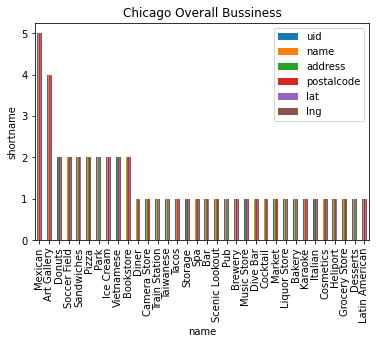

In [25]:
from matplotlib import pyplot as plt
chicago_df2_sorted.plot(kind='bar')

plt.title('Chicago Overall Bussiness')
plt.ylabel('shortname')
plt.xlabel('name')

plt.show()

In [26]:
# one hot encoding
chicago_onehot = pd.get_dummies(df2[['shortname']], prefix="", prefix_sep="")
#chicago_onehot.drop(['postalcode'],axis=1,inplace=True) 
chicago_onehot.insert(loc=0, column='postalcode', value=df2['postalcode'] )
chicago_onehot.shape

(49, 35)

In [27]:
chicago_onehot

,postalcode,Art Gallery,Bakery,Bar,Bookstore,Brewery,Camera Store,Cocktail,Cosmetics,Desserts,...,Pub,Sandwiches,Scenic Lookout,Soccer Field,Spa,Storage,Tacos,Taiwanese,Train Station,Vietnamese
0,60608,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60608,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60608,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,60608,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60608,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,60616,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,60608,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,60616,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,60608,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,60608,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [28]:
chicago_df2 = chicago_onehot.groupby('postalcode').mean().reset_index()
chicago_df2.head()

,postalcode,Art Gallery,Bakery,Bar,Bookstore,Brewery,Camera Store,Cocktail,Cosmetics,Desserts,...,Pub,Sandwiches,Scenic Lookout,Soccer Field,Spa,Storage,Tacos,Taiwanese,Train Station,Vietnamese
0,60608,0.108108,0.027027,0.027027,0.054054,0.027027,0.000000,0.027027,0.027027,0.027027,...,0.027027,0.054054,0.027027,0.054054,0.027027,0.000000,0.027027,0.027027,0.027027,0.054054
1,60616,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000


In [29]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Step4: To find best Area for business , using business data and visualize them in maps and color them according to zip code

Step 5 : Cluster them by Zipcode to categorize area profile

In [30]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['postalcode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['postalcode'] = chicago_df2['postalcode']

for ind in np.arange(chicago_df2.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_df2.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,postalcode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,60608,Art Gallery,Mexican,Soccer Field,Bookstore,Park
1,60616,Pizza,Ice Cream,Karaoke,Music Store,Storage


In [31]:
kclusters = 2

toronto_grouped_clustering = chicago_df2.drop('postalcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1], dtype=int32)

In [32]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df2

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('postalcode'), on='postalcode')

In [33]:
toronto_merged.dtypes

uid                       object
name                      object
shortname                 object
address                   object
postalcode                object
lat                      float64
lng                      float64
Cluster Labels             int32
1st Most Common Venue     object
2nd Most Common Venue     object
3rd Most Common Venue     object
4th Most Common Venue     object
5th Most Common Venue     object
dtype: object

In [34]:
address = 'Chicago, US'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 41.8755616, -87.6244212.


In [35]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['lat'], toronto_merged['lng'], toronto_merged['postalcode'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Step6: I will pick location for new coffee-specialty shop where far from others but in area where target customers in

In [36]:
#41.852695734534485, -87.65189634990578
latitude = 41.852695734534485
longitude = -87.65189634990578
map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco
# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='New Coffee Shop',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(map)

map.add_child(plugins.HeatMap(hm_data))
map

# Conclusion

I will need a location where we can catch out customers from "hot" location we have picked up from the map and stay in a certain distance so as to lessen the compactivity of business. Red spot is the location for New Coffee shop which locate in popular coffee shop area and far enough for make a new coverage for target customers